# UDACITY DATA ANALYSIS NANODEGREE


## Project III - DATA VISUALIZATION

  ### FordGoBike Bay Area

# Introduction
 The FordgoBke system data includes information about individual rides ina bike system covring the San Francisco Bay Area.
 
 According to [Wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels),
 
 Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.

Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company.

After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.[5] The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

Data source: [Ford GoBike System Data](https://www.lyft.com/bikes/bay-wheels/system-data) captured during 2019 Aug.


## Preliminary Wrangling

## Data Description -

The Columns in this data include
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

## Data Extraction 
 The data was downloaded from [FordGoBike-Data](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) then manually uploaded to the workspace which eventually is imported programmatically using Python.

In [74]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [75]:
# import the data

data = pd.read_csv('fordgobike-tripdata.csv')

In [76]:
# first few rows
data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [77]:
# last few rows
data.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [78]:
# check the informattion about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [79]:
# data types of each column 
data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [80]:
# uniques values for each columns
data.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [81]:
# rows and columns of the data
data.shape

(183412, 16)

In [82]:
# descriptive statistics 
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# DATA WRANGLING 

## Assess Data Quality

 ### Data Quality & Tidiness
Examine the data to check if -

- the data complete (does it cover all the cases required)?
- it is correct, or does it contain errors?
- therenAre missing values in the data?

And make necssary corrections

In [83]:
data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [84]:
# check for duplicates 
data.duplicated().sum()

0

# DATA CLEANING 

1. Missing Values

 - start_station_id 
 - start_station_name 
 - member_birth_year 
 - member_gender

All have missing values so we should remove this null values.

2. Wrong Data types

 - Data Type of start_time
 - end_time
 - start_station_id
 - end_station_id
 - member_birth_year 

will be changed to their appropriate Dtype.

3. From value_counts() and df.describe() we figure out that: member_birth_year has outliers like (1930, 1910, 1927, 1928, 1878) Though we should correct that by removing the outliers.

4. - Extract columns from Date-Time columns for better visualization and to fetch more insights to the data.

5. - Create distance_km column from Longituide and Latitiude Columns for better visualization.



In [85]:
#3create a clean data 
data_clean = data.copy()

In [86]:
# remove all null values 
data_clean = data_clean.dropna();

In [87]:
#confirm by checking the shape
data_clean.shape

(174952, 16)

In [88]:
#check for null values 
data_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Define
convert the date columns to datetime data type

### Code

In [89]:
#Change the date columns from object to 'datetime' dtype..
data_clean['start_time']= pd.to_datetime(data_clean['start_time'])
data_clean['end_time']= pd.to_datetime(data_clean['end_time'])

In [90]:
data_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [91]:
#Change the Columns from Float to int64..
data_clean = data_clean.astype({"start_station_id":'int', "end_station_id":'int', "member_birth_year":'int'})  

### Test

In [92]:
#confirm by checking the data types of the data
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(5), object(5)
memory usage: 2

In [93]:
# check the member birth year 
data_clean.member_birth_year.value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
1992     8245
1987     8010
1986     7953
1994     7654
1995     7420
1985     7023
1984     6557
1983     5953
1980     5011
1982     4987
1996     4637
1981     4344
1979     3756
1997     3476
1998     3208
1978     2830
1977     2706
1974     2633
1999     2504
1975     2503
1976     2435
1973     2080
1968     1927
1971     1924
1972     1909
        ...  
1954      301
1952      189
1951      180
1950      178
1953      158
1947      135
1955      134
1945      105
1949       99
1931       89
1900       53
1948       51
2001       34
1943       30
1942       21
1933       20
1946       19
1939       11
1902       11
1941        9
1901        6
1938        3
1920        3
1934        2
1944        2
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

### Define

Add columns for the age to create an easy to use attribute for analysis

### Code

In [94]:
# Create age columns for easier working..
data_clean['member_age'] = 2019 - data_clean['member_birth_year']

In [95]:
#check the value counts fo each age 
data_clean.member_age.value_counts()

31     10214
26      9323
30      8967
29      8640
28      8484
27      8245
32      8010
33      7953
25      7654
24      7420
34      7023
35      6557
36      5953
39      5011
37      4987
23      4637
38      4344
40      3756
22      3476
21      3208
41      2830
42      2706
45      2633
20      2504
44      2503
43      2435
46      2080
51      1927
48      1924
47      1909
       ...  
65       301
67       189
68       180
69       178
66       158
72       135
64       134
74       105
70        99
88        89
119       53
71        51
18        34
76        30
77        21
86        20
73        19
80        11
117       11
78         9
118        6
99         3
81         3
85         2
75         2
92         1
91         1
109        1
89         1
141        1
Name: member_age, Length: 75, dtype: int64

#### Test 

In [96]:
data_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age'],
      dtype='object')

### Some strange values are present maybe due to incorrect birth years

### Define 
Clean the member_age column to a reasonable value for better use 

#### Code

In [97]:
# Check the percentiles of 99% of the data to visualize the outliers and non-valid values..
data_clean.member_age.describe(percentiles = [0.99])

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: member_age, dtype: float64

In [98]:
# See the data for condition `member_age >64`..
data_clean[(data_clean.member_age >64)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
495,235,2019-02-28 21:17:57.047,2019-02-28 21:21:52.631,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,58,Market St at 10th St,37.776619,-122.417385,5202,Subscriber,1954,Male,No,65
994,384,2019-02-28 19:56:45.837,2019-02-28 20:03:10.473,250,North Berkeley BART Station,37.873558,-122.283093,257,Fifth St at Delaware St,37.870407,-122.299676,1671,Subscriber,1954,Male,No,65
1073,303,2019-02-28 19:49:38.120,2019-02-28 19:54:42.044,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,76,McCoppin St at Valencia St,37.771662,-122.422423,6333,Subscriber,1945,Male,Yes,74
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes,119
1343,1362,2019-02-28 19:02:33.643,2019-02-28 19:25:16.561,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,97,14th St at Mission St,37.768265,-122.420110,48,Subscriber,1954,Male,No,65
1356,561,2019-02-28 19:14:40.123,2019-02-28 19:24:01.450,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6192,Subscriber,1954,Male,No,65
1484,359,2019-02-28 19:06:10.196,2019-02-28 19:12:09.313,223,16th St Mission BART Station 2,37.764765,-122.420091,106,Sanchez St at 17th St,37.763242,-122.430675,6579,Subscriber,1954,Female,No,65
1526,852,2019-02-28 18:54:26.814,2019-02-28 19:08:39.214,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,6,The Embarcadero at Sansome St,37.804770,-122.403234,5091,Subscriber,1952,Male,No,67
1586,683,2019-02-28 18:52:11.054,2019-02-28 19:03:34.528,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,26,1st St at Folsom St,37.787290,-122.394380,4976,Subscriber,1948,Male,No,71
1847,288,2019-02-28 18:41:35.474,2019-02-28 18:46:23.632,58,Market St at 10th St,37.776619,-122.417385,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,6220,Subscriber,1954,Male,No,65


In [99]:
# Remove the Outliers values that `member_age >64`
data_clean.drop(data_clean[(data_clean.member_age >64)].index, inplace = True)

### Test

In [100]:
#check the description of the member_age column 
data_clean.member_age.describe()

count    173272.000000
mean         33.828253
std           9.378430
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          64.000000
Name: member_age, dtype: float64

#### 75% of members is aged 39 or Lower

### Define

Create easy to use columns for analysis purposes for the month, day of the week, and hour

### Code

### Extract columns from Date-Time columns 
This will be used for Data Visualization

In [101]:
# Extract Date only from `start_time` Column..
data_clean['start_date'] = data_clean.start_time.dt.strftime('%Y-%m-%d')

# Extract Year only from `start_time` Column..
data_clean['year'] = data_clean.start_time.dt.strftime('%Y')

# Extract Month only from `start_time` Column..
data_clean['start_month'] =  data_clean.start_time.dt.strftime('%B')

# Extract WeekDay only from `start_time` Column..
data_clean['start_week'] = data_clean.start_time.dt.strftime('%A')

# Extract DayNumber only from `start_time` Column..
data_clean['start_day'] = data_clean.start_time.dt.strftime('%d')

# Extract Trip_StartHour only from `start_time` Column..
data_clean['start_hour'] = data_clean.start_time.dt.strftime('%H')

# Extract Trip_EndHour only from `end_time` Column..
data_clean['end_hour'] = data_clean.end_time.dt.strftime('%H')

# df['start_hour'] has been changed to df['start_time'].dt.hour
# df['end_hour'] has been changed to df['end_time'].dt.hour

In [102]:
# Create a column (duration in minutes) from `duration_sec`..
data_clean['duration_min'] = data_clean['duration_sec']/60

In [103]:
# Change these Columns from object to int64.. for easy visualization
col=['year','start_day', 'start_hour', 'end_hour']
for c in col:
    data_clean[c] = pd.to_numeric(data_clean[c])

In [104]:
# Change the date columns from object to 'datetime' dtype..
data_clean['start_date'] = pd.to_datetime(data_clean['start_date']) 

In [105]:
# Create a (day_period) column from Trip_StarTime for better visualization..
data_clean['day_period'] = 'morning0_11'
data_clean['day_period'][(data_clean['start_hour'] >= 12) & (data_clean['start_hour'] <= 17)] = 'afternoon12_17'
data_clean['day_period'][(data_clean['start_hour'] >= 18) & (data_clean['start_hour'] <= 23)] = 'night18_23'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [106]:
# Check the values of the duration_min column..
data_clean.duration_min.value_counts()

4.533333       307
5.083333       282
6.150000       280
5.383333       279
5.100000       274
5.400000       274
4.566667       273
5.900000       273
5.733333       272
6.333333       271
6.450000       270
4.950000       269
4.400000       269
5.600000       269
5.716667       268
4.500000       268
5.616667       267
5.483333       266
5.250000       265
5.683333       265
7.400000       264
6.100000       264
5.300000       263
5.416667       263
4.783333       261
4.916667       261
4.483333       261
5.650000       260
4.666667       260
6.283333       260
              ... 
46.600000        1
48.916667        1
59.633333        1
67.300000        1
68.983333        1
54.633333        1
229.600000       1
196.866667       1
46.650000        1
1043.566667      1
108.033333       1
97.650000        1
394.650000       1
260.766667       1
58.433333        1
53.616667        1
53.633333        1
58.316667        1
228.216667       1
63.383333        1
68.433333        1
67.183333   

In [107]:
# Check the values of the duration in day column..
data_clean.day_period.value_counts()

morning0_11       66765
afternoon12_17    66217
night18_23        40290
Name: day_period, dtype: int64

### Test

In [108]:
#check the data
data_clean.sample(10)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period
174493,858,2019-02-02 17:48:53.769,2019-02-02 18:03:12.200,262,West St at University Ave,37.869967,-122.286533,273,Fulton St at Ashby Ave,37.855574,...,27,2019-02-02,2019,February,Saturday,2,17,18,14.300000,afternoon12_17
2626,315,2019-02-28 17:58:41.456,2019-02-28 18:03:57.120,148,Horton St at 40th St,37.829705,-122.287610,155,Emeryville Public Market,37.840521,...,42,2019-02-28,2019,February,Thursday,28,17,18,5.250000,afternoon12_17
10943,222,2019-02-27 19:26:24.784,2019-02-27 19:30:07.412,13,Commercial St at Montgomery St,37.794231,-122.402923,6,The Embarcadero at Sansome St,37.804770,...,25,2019-02-27,2019,February,Wednesday,27,19,19,3.700000,night18_23
31135,350,2019-02-24 17:32:33.275,2019-02-24 17:38:23.474,377,Fell St at Stanyan St,37.771917,-122.453704,380,Masonic Ave at Turk St,37.779047,...,36,2019-02-24,2019,February,Sunday,24,17,17,5.833333,afternoon12_17
90037,541,2019-02-16 13:53:12.707,2019-02-16 14:02:14.066,197,El Embarcadero at Grand Ave,37.808848,-122.249680,200,2nd Ave at E 18th St,37.800214,...,21,2019-02-16,2019,February,Saturday,16,13,14,9.016667,afternoon12_17
144514,1390,2019-02-07 11:44:11.387,2019-02-07 12:07:22.071,60,8th St at Ringold St,37.774520,-122.409449,360,Newhall St at 3rd St,37.738572,...,28,2019-02-07,2019,February,Thursday,7,11,12,23.166667,morning0_11
31133,365,2019-02-24 17:32:51.168,2019-02-24 17:38:56.959,105,16th St at Prosper St,37.764285,-122.431804,356,Valencia St at Clinton Park,37.769188,...,40,2019-02-24,2019,February,Sunday,24,17,17,6.083333,afternoon12_17
21769,626,2019-02-26 08:51:47.108,2019-02-26 09:02:13.266,159,24th St at Market St,37.816060,-122.278244,160,West Oakland BART Station,37.805318,...,31,2019-02-26,2019,February,Tuesday,26,8,9,10.433333,morning0_11
167323,329,2019-02-04 17:28:01.153,2019-02-04 17:33:31.005,28,The Embarcadero at Bryant St,37.787168,-122.388098,364,China Basin St at 3rd St,37.772000,...,53,2019-02-04,2019,February,Monday,4,17,17,5.483333,afternoon12_17
149266,429,2019-02-06 19:37:12.980,2019-02-06 19:44:22.700,370,Jones St at Post St,37.787327,-122.413278,285,Webster St at O'Farrell St,37.783521,...,33,2019-02-06,2019,February,Wednesday,6,19,19,7.150000,night18_23


#### Define

##### Create distance_km column from Longituide and Latitiude Columns for better visualization.

### Code 

In [109]:
from math import sin, cos, sqrt, atan2, radians

def Distance_In_KM(Start_Station, End_Station):
    """
    This Function to calculate the distance from `Longituide` and `Latitiude` of start and end stations and Given Raduis of
    the Earth in Km. 
    *Start_Station is Tuple of start station (Longituide,Longituide)
    *End_Station is Tuple of end station (Longituide,Longituide)
    """
    lat1, lon1 = Start_Station
    lat2, lon2 = End_Station
    R = 6373                   # approximate radius of earth in km

    dlon = radians(lon2 - lon1)
    dlat = radians(lat2 - lat1)

    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    Distance = R * c
    
    return Distance

In [110]:
# Check the Function..
Distance_In_KM((52.2296756,21.0122287),(52.406374,16.9251681))

278.54558935106706

In [111]:
# Create the `distance_km` Column from the Fuction above..
data_clean['distance_km'] = data_clean.apply(lambda x: Distance_In_KM((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

### Test

In [112]:
#check the data
data_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,2019-02-28,2019,February,Thursday,28,17,8,869.75,afternoon12_17,0.544879
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,2019-02-28,2019,February,Thursday,28,12,5,1030.90,afternoon12_17,2.705394


### Define

There's a mixture of gender categories, e.g. Male/M and Female/F.
Let's Change this to consistent values.

#### Code

In [113]:
data_clean["member_gender"].value_counts()

Male      129101
Female     40574
Other       3597
Name: member_gender, dtype: int64

In [114]:
data_clean.loc[data_clean['member_gender'] == 'M', 'member_gender'] = 'Male'
data_clean.loc[data_clean['member_gender'] == 'F', 'member_gender'] = 'Female'
data_clean.loc[data_clean['member_gender'] == 'O', 'member_gender'] = 'Other'

### Test

In [115]:
data_clean["member_gender"].value_counts()

Male      129101
Female     40574
Other       3597
Name: member_gender, dtype: int64

In [116]:
# save the clean data 
data_clean.to_csv('fordgo_master_clean.csv', index = False)

###  Structure of the dataset

 - The FordGoBike contains 183412 rows and 16 colunms
 - The data types contained in this data has 9 Numeric and 7 Categorical data
 - After working with the nulls and extracting the data from the Date-Time Columns, the new shape of the data becomes 173272 rows and 27 Columns.

### Main feature(s) of interest in the dataset

- Trip Duration (start time and end time)
- Member Gender (male and female)
- Age 
- Day Period

### The features in the dataset that will help support the investigation 

- Gender
- Member Birth
- User-Type
- Bike-share-for-all-trip
- Duration
- member_age
- start_week
- start_day
- start_hour
- duration_min
- day_period
- distance_km

In [117]:
# create the clean data into csv file
data_clean.to_csv('fordgo_master_clean.csv', index = False)

In [118]:
# import the new data into a dataframe
data = pd.read_csv('fordgo_master_clean.csv')

# Univariate Exploration



In [119]:
data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_date', 'year', 'start_month', 'start_week',
       'start_day', 'start_hour', 'end_hour', 'duration_min', 'day_period',
       'distance_km'],
      dtype='object')

In [120]:
sb.set(rc={'figure.figsize': [14, 14]}, font_scale=1.2)

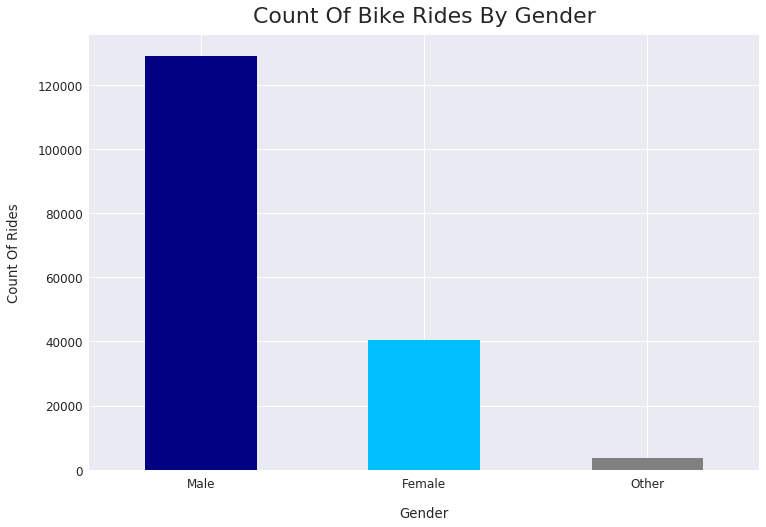

In [121]:
data['member_gender'].value_counts().plot.bar(color=['navy','deepskyblue','gray'],figsize=(12,8), legend=False)
plt.title('Count Of Bike Rides By Gender', fontsize=22, y=1.015)
plt.xlabel('Gender', labelpad=16)
plt.ylabel('Count Of Rides', labelpad=16)
plt.xticks(rotation=360);


#### - The Male Gender have more Bike Trips 

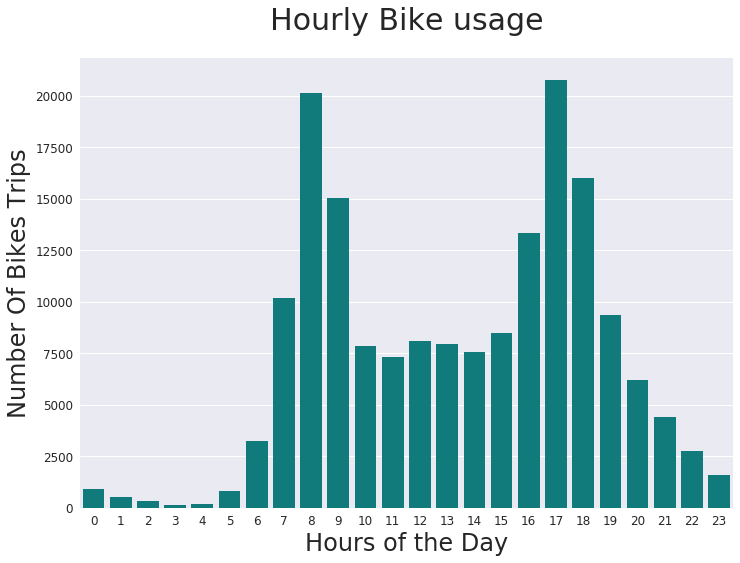

In [122]:
fig, ax = plt.subplots()
ax = sb.countplot(data = data, x ='start_hour', color = 'darkcyan')
ax.set_xlabel("Hours of the Day", fontsize=24) 
ax.set_ylabel("Number Of Bikes Trips", fontsize=24)
fig.set_size_inches(11.7, 8.27)
ax.set_title('Hourly Bike usage', y=1.05, fontsize=30);

### - The mid day hours and Afternoon hours are the most numbers of trip but in my opinion this figure is better visualization than pervious one.

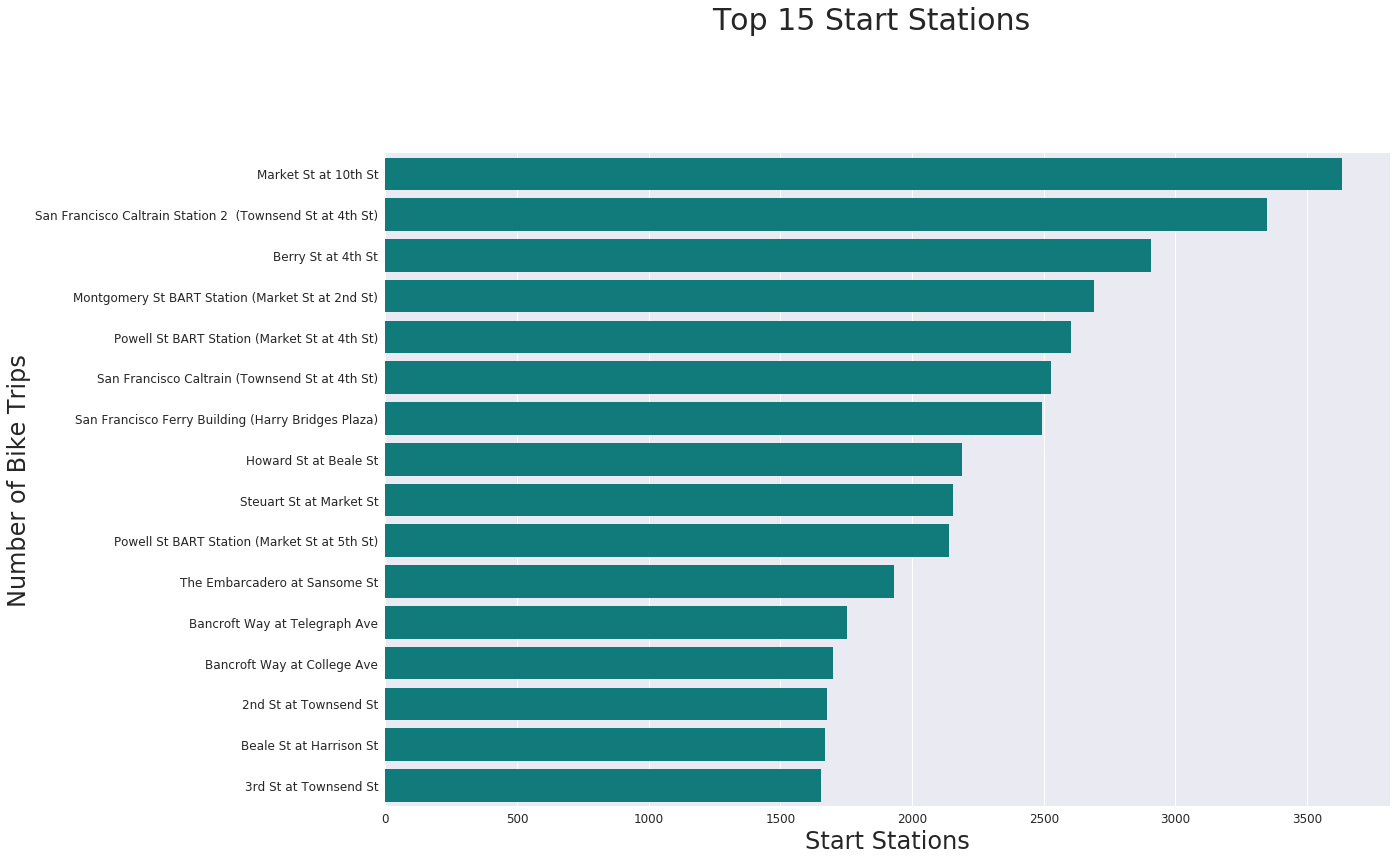

In [123]:
# Monthly usage of the Ford Go Bike system

fig, ax = plt.subplots()

ax = sb.countplot(data = data,  y = 'start_station_name', color = 'darkcyan', order=data['start_station_name'].value_counts().index[:16]);
ax.set_xlabel('Start Stations', fontsize=24) 
ax.set_ylabel('Number of Bike Trips', fontsize=24),
fig.suptitle('Top 15 Start Stations', y=1.05, fontsize = 30);
fig.set_size_inches(18,12)


### - Thursday is the day that most mubers of bike trips and Saturday and Sunday are the least ad they are the weekends.

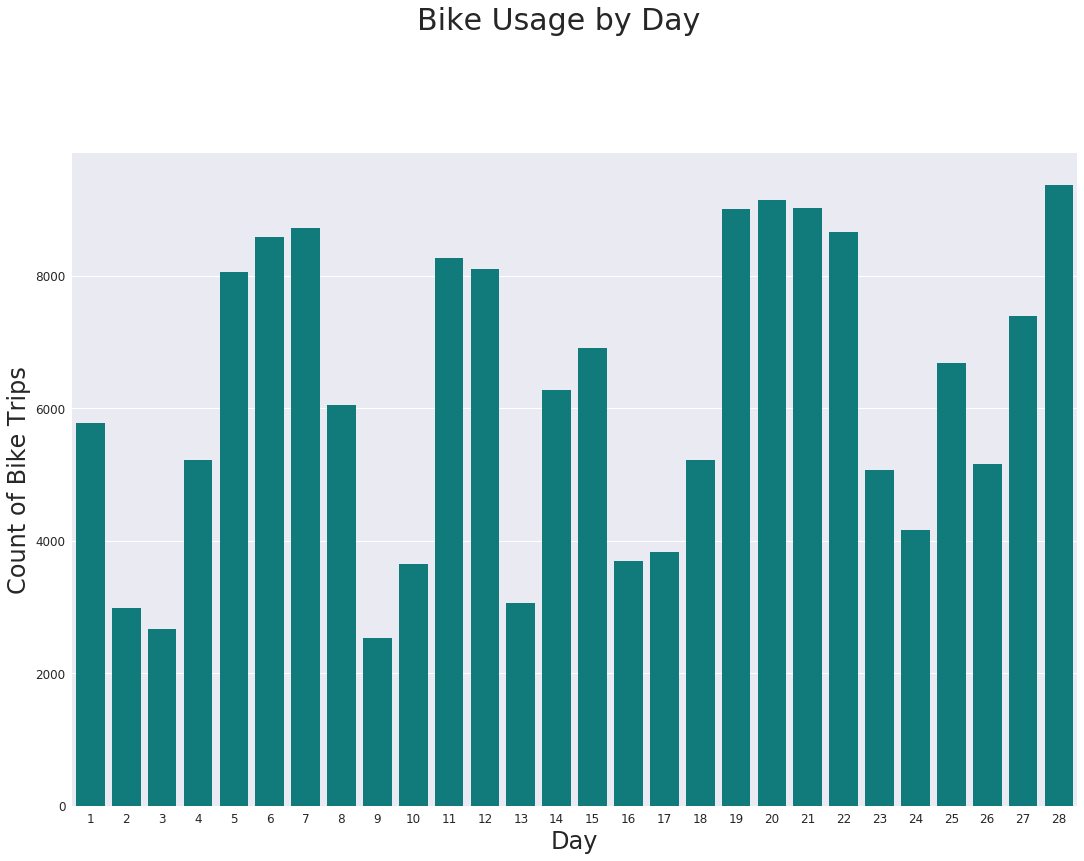

In [124]:


fig, ax = plt.subplots()

ax = sb.countplot(data = data,  x = 'start_day', color = 'darkcyan');
ax.set_xlabel('Day', fontsize=24) 
ax.set_ylabel('Count of Bike Trips', fontsize=24),
fig.suptitle('Bike Usage by Day', y=1.05, fontsize = 30);
fig.set_size_inches(18,12)


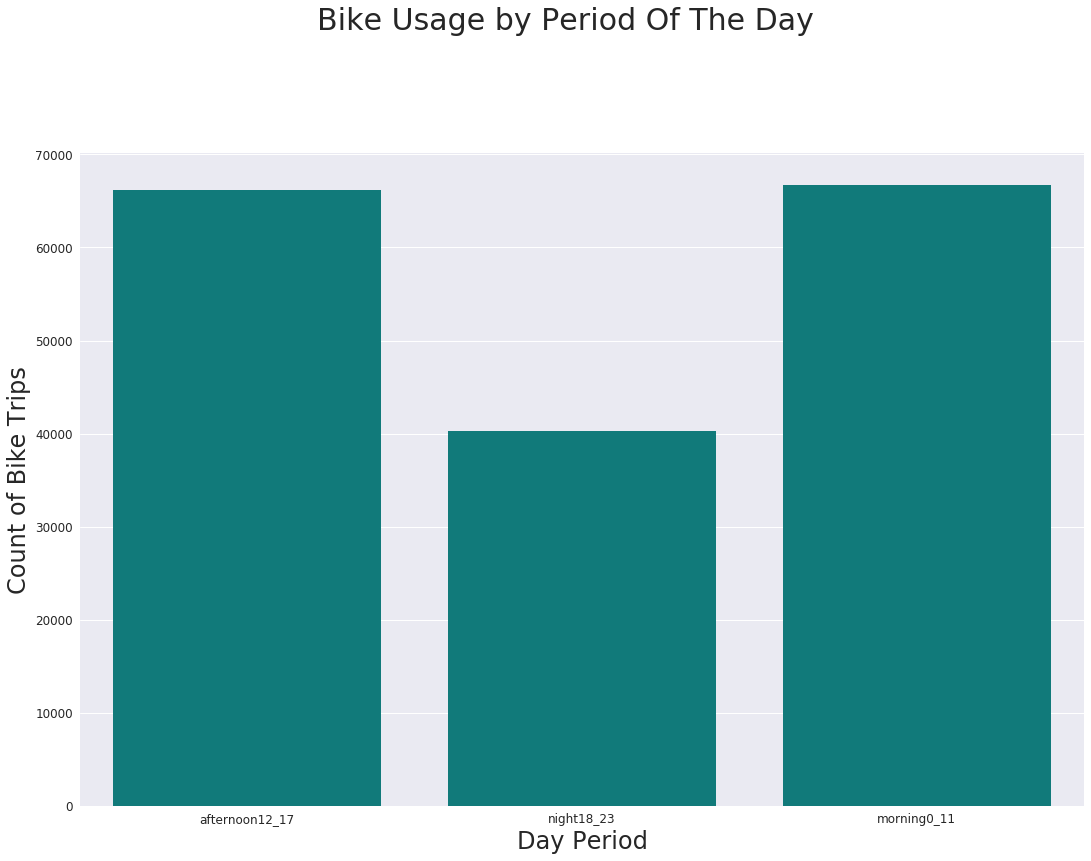

In [125]:


fig, ax = plt.subplots()

ax = sb.countplot(data = data,  x = 'day_period', color = 'darkcyan');
ax.set_xlabel('Day Period', fontsize=24) 
ax.set_ylabel('Count of Bike Trips', fontsize=24),
fig.suptitle('Bike Usage by Period Of The Day', y=1.05, fontsize = 30);
fig.set_size_inches(18,12)


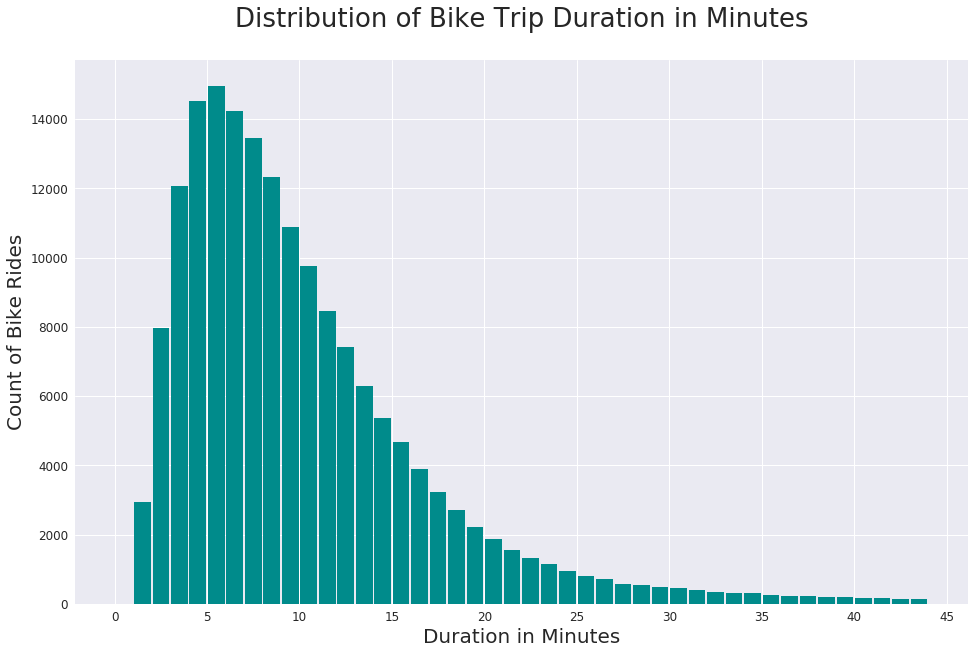

In [126]:
# distribution of bike trip in minutes

bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=(16,10))
plt.hist(data = data, x = 'duration_min', bins = bin_edges, color = 'darkcyan', rwidth = 0.9);

plt.title("Distribution of Bike Trip Duration in Minutes", y=1.05, fontsize=26);
plt.xlabel('Duration in Minutes',fontsize= 20);
plt.ylabel("Count of Bike Rides",fontsize= 20);
plt.xticks(ticks, labels);

### - Most cycle journeys look to be a duration is between 5-10 minutes.

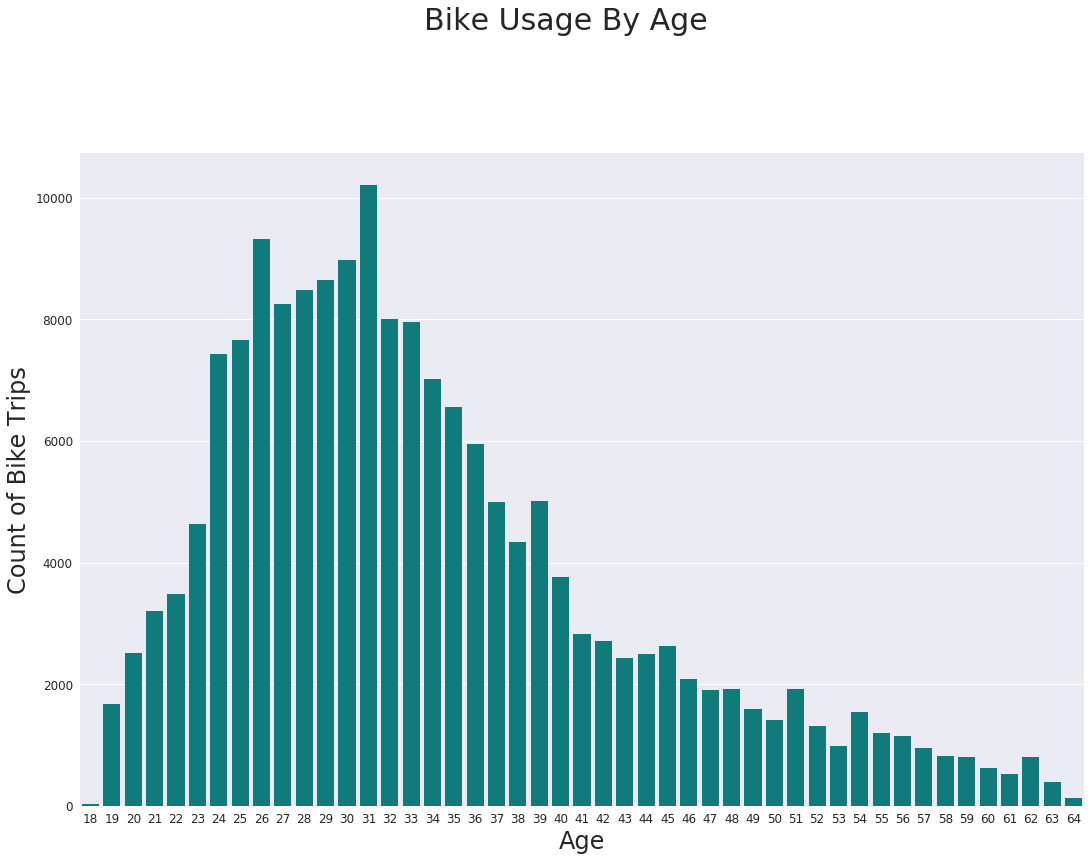

In [127]:
fig, ax = plt.subplots()

ax = sb.countplot(data = data,  x = 'member_age', color = 'darkcyan');
ax.set_xlabel('Age', fontsize=24) 
ax.set_ylabel('Count of Bike Trips', fontsize=24),
fig.suptitle('Bike Usage By Age', y=1.05, fontsize = 30);
fig.set_size_inches(18,12)


#### - Age 31 has th highest bike rdde count 
#### - The range from 24 to 36 are the most bikers and range 49 to 64 are the least
#### - And 18 year old are the least because it seems the data for this age is lower than other ages.

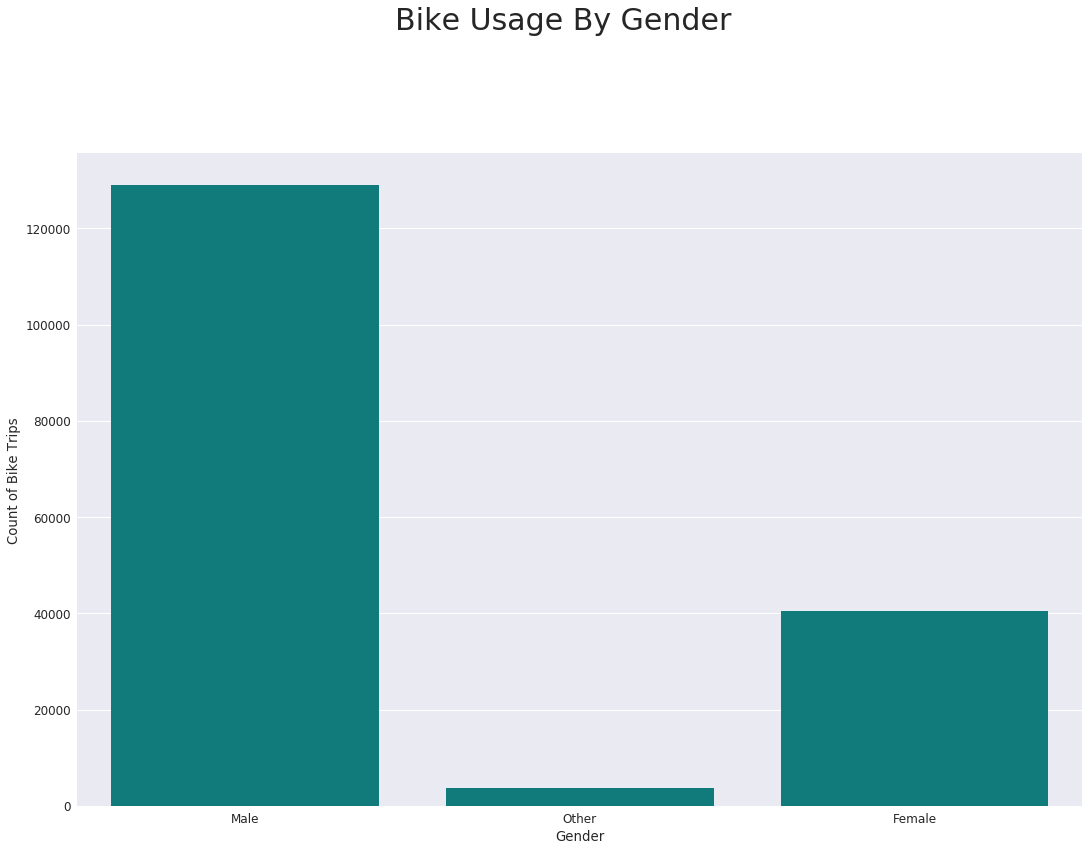

In [128]:
fig, ax = plt.subplots( figsize = [16,14])
age_bin_edges = np.arange(0, 70, 10)
sb.countplot(data = data, x = 'member_gender', color = 'darkcyan')
ax.set_xlabel('Gender');
ax.set_ylabel('Count of Bike Trips');
fig.suptitle('Bike Usage By Gender', y=1.05, fontsize = 30);
fig.set_size_inches(18,12)


#### - Most bike trips are by male gender.

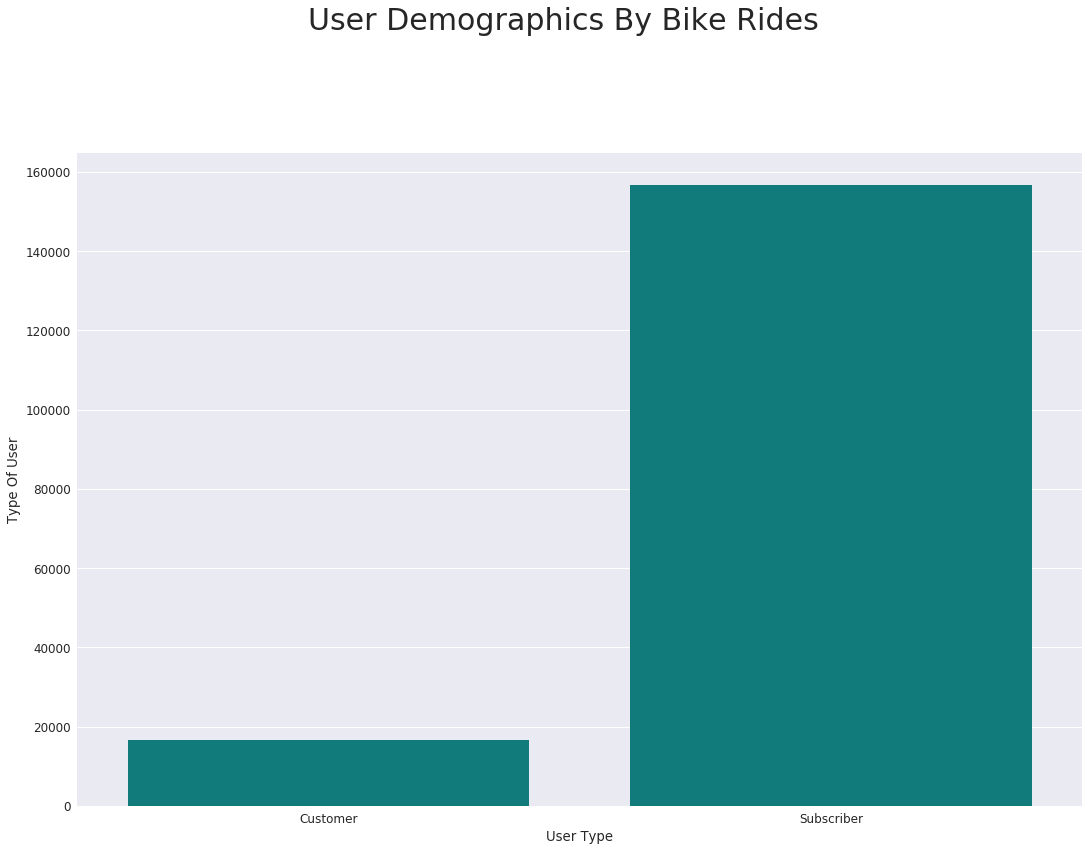

In [129]:
# number of users' bike rides 

fig, ax = plt.subplots( figsize = [16,14])
age_bin_edges = np.arange(0, 70, 10)
sb.countplot(data = data, x = 'user_type', color = 'darkcyan')
ax.set_xlabel('User Type');
ax.set_ylabel('Type Of User');
fig.suptitle('User Demographics By Bike Rides', y=1.05, fontsize = 30);
fig.set_size_inches(18,12)


####  -   Most number of bike trips are by subscriber users than customer users and i think it because the subscribers have offers for bike trips.

Text(0.5,1,'Ford GoBike System User by Trip Distance in KM')

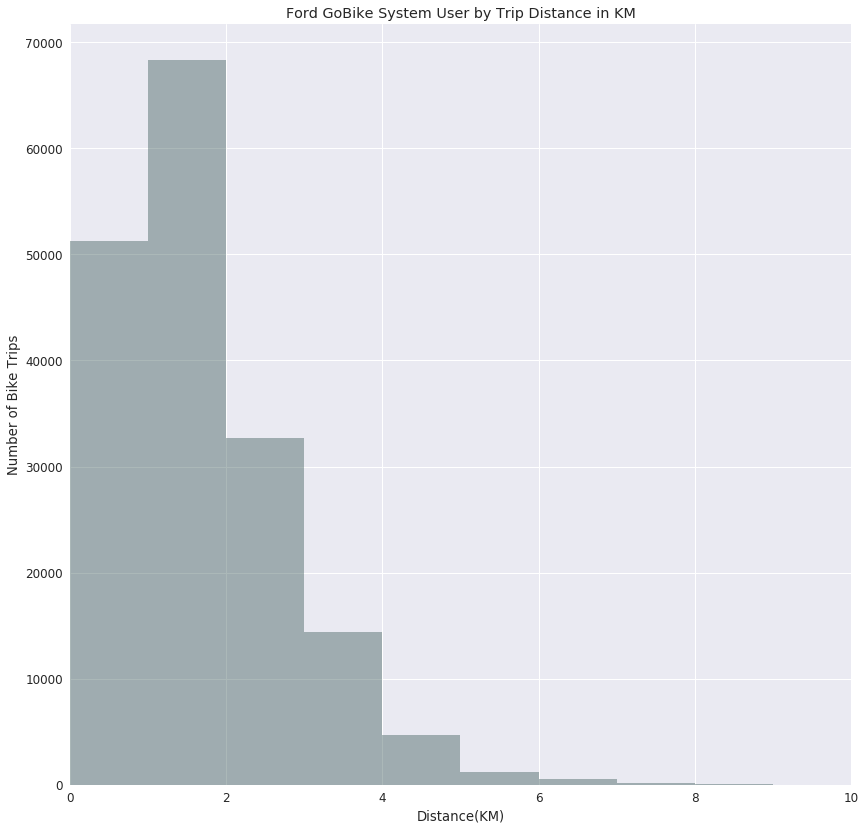

In [130]:
# bike usage by distance in km
fig, ax = plt.subplots()
bin_edges = np.arange(0, 45, 1)
ax = sb.distplot(data['distance_km'], bins=bin_edges,kde=False, color = "darkslategrey")
plt.xlim(0, 10)
ax.set_xlabel('Distance(KM)')
ax.set_ylabel('Number of Bike Trips')
ax.set_title('Ford GoBike System User by Trip Distance in KM')

#### - Most trips distance are from 1 to 2 km and the range of all trips from 0 to 5 km and rare who above 5 km. 
#### - It should be noted that the trips with distance 0 km mean that the start and end station are the same but they made a trip



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.


 #### Highlighted some interesting points -
 
  - distributions of usage and demographics.
  -  I noted from looking into days and hours, that the peak usage time is around the commuting rush hour traffic times 
  (Week days 8-9am and 5pm-6pm). This highlights our primary market is the commuter user.
  
  - The typical bike ride is most likely to be around 5 to 10 minutes long, and most likely to cover a distance of 2 km or lesser
  
  - The user demographics bike usage shows that majority of members are likely to be male between 20 and 40
  
  - Visualising with time in seconds is not intuitive to read, so I decided to go back to the cleaning phase and transpose this into minutes. In addition, we also added a step to the cleaning phase of the wrangling process to work out distance travelled.
  


 - No, i didn't change the form of data because i create more columns in the cleaning step for better visualization.
 - After observing the data, I was surprised to note that the usage durations were so low. To further expand on this,, I decided to try and determine the distances travelled to see if the the short times correponded to short distances, and added this to the cleaning phase of the wrangling process. Doing this confirmed the durations were correct, since distances were correspondingly low.

# Bivariate Exploration



In [131]:
data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
27872,301,2019-02-25 07:48:58.311,2019-02-25 07:53:59.787,269,Telegraph Ave at Carleton St,37.862320,-122.258801,245,Downtown Berkeley BART,37.870139,...,2019-02-25 00:00:00.000,2019,February,Monday,25,7,7,5.016667,morning0_11,1.212488
115701,612,2019-02-11 11:57:17.965,2019-02-11 12:07:30.255,129,Harrison St at 20th St,37.758862,-122.412544,81,Berry St at 4th St,37.775880,...,2019-02-11 00:00:00.000,2019,February,Monday,11,11,12,10.200000,morning0_11,2.546576
87184,845,2019-02-15 18:48:17.127,2019-02-15 19:02:23.004,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,109,17th St at Valencia St,37.763316,...,2019-02-15 00:00:00.000,2019,February,Friday,15,18,19,14.083333,night18_23,2.767960
17328,493,2019-02-26 19:18:25.870,2019-02-26 19:26:39.044,22,Howard St at Beale St,37.789756,-122.394643,6,The Embarcadero at Sansome St,37.804770,...,2019-02-26 00:00:00.000,2019,February,Tuesday,26,19,19,8.216667,night18_23,1.832775
144437,379,2019-02-06 14:25:26.757,2019-02-06 14:31:46.208,90,Townsend St at 7th St,37.771058,-122.402717,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,2019-02-06 00:00:00.000,2019,February,Wednesday,6,14,14,6.316667,afternoon12_17,1.367528


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173272 entries, 0 to 173271
Data columns (total 27 columns):
duration_sec               173272 non-null int64
start_time                 173272 non-null object
end_time                   173272 non-null object
start_station_id           173272 non-null int64
start_station_name         173272 non-null object
start_station_latitude     173272 non-null float64
start_station_longitude    173272 non-null float64
end_station_id             173272 non-null int64
end_station_name           173272 non-null object
end_station_latitude       173272 non-null float64
end_station_longitude      173272 non-null float64
bike_id                    173272 non-null int64
user_type                  173272 non-null object
member_birth_year          173272 non-null int64
member_gender              173272 non-null object
bike_share_for_all_trip    173272 non-null object
member_age                 173272 non-null int64
start_date                 173272 non-nul

In [133]:
# Extract the numeric columns from the data frame..
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_columns = data.select_dtypes(include=numerics).columns

In [134]:
# Display the numeric columns names..
numeric_columns

Index(['duration_sec', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age',
       'year', 'start_day', 'start_hour', 'end_hour', 'duration_min',
       'distance_km'],
      dtype='object')

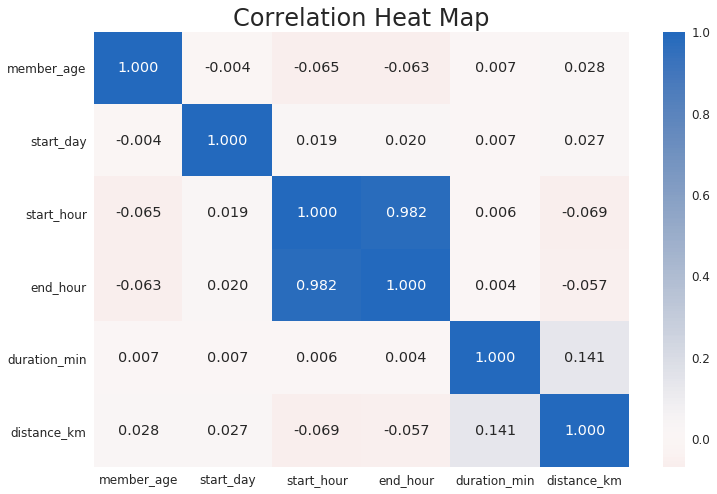

In [135]:
# Plot heat map betwwen the interested numeric columns..
numeric_col=['member_age','start_day', 'start_hour', 'end_hour', 'duration_min','distance_km']
plt.figure(figsize = [12, 8])
ax = plt.axes()
sb.heatmap(data[numeric_col].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0,ax=ax)
ax.set_title('Correlation Heat Map', fontsize=24)
plt.show()

#### - There are relation between start_hour, end_hour and duration_min, distance_km.

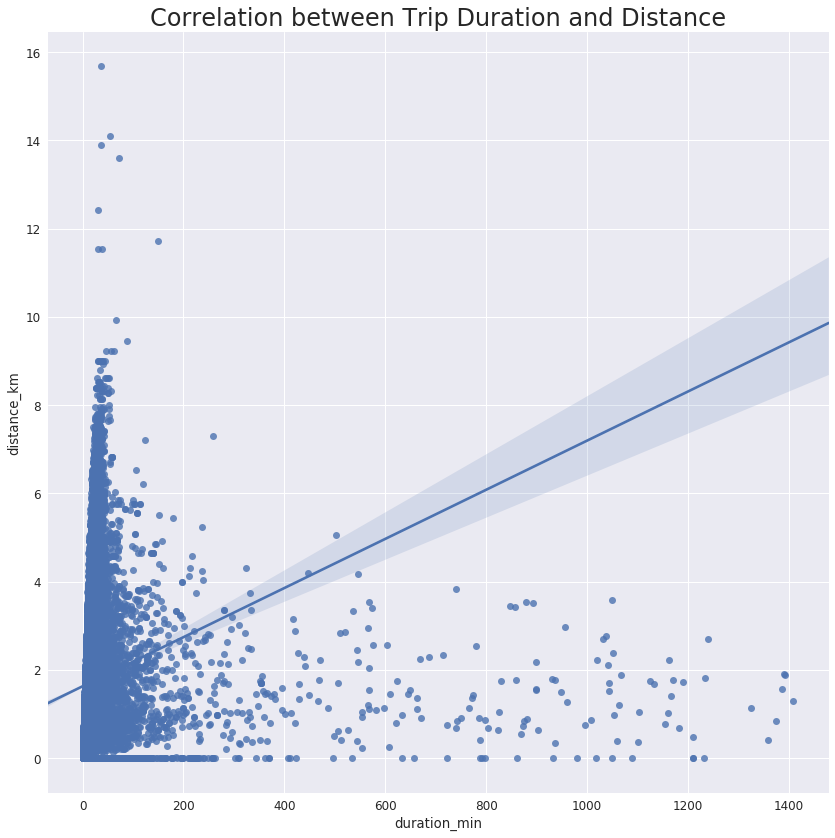

In [136]:
# Plot regression plot again but with removing the outlier to be more accuracte..
ax = plt.axes()
sb.regplot(data=data[data.distance_km<=20],x='duration_min', y='distance_km',ax=ax)
ax.set_title("Correlation between Trip Duration and Distance", fontsize=24)
plt.show()

####  - Here, we could say that with increase in the distance the duration of trip increases as well but since at 0 distance there is also a trip duration and that's becuase of the fact that one may the start and end station the same by making a trip and going back to the same start point.

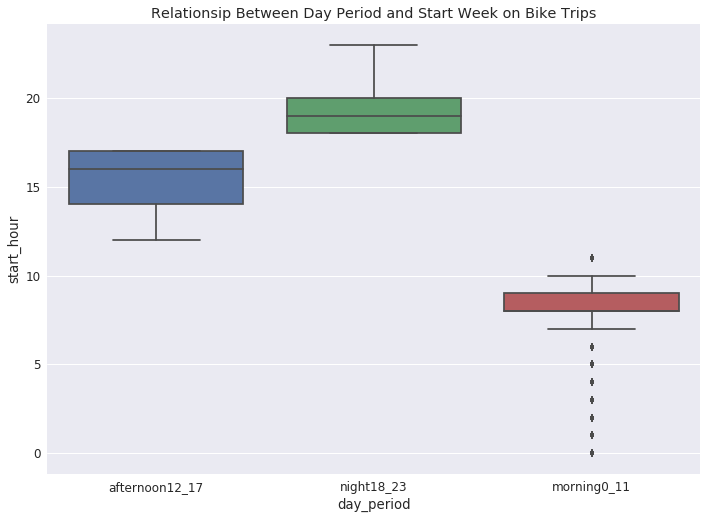

In [137]:
# Boxplot between day_period and start_hour to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="day_period", y="start_hour",data=data)
ax.set_title('Relationsip Between Day Period and Start Week on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()


#### -  The median for afternoon and night periods is closer. the spread of data for morning period is between 10 to 11.

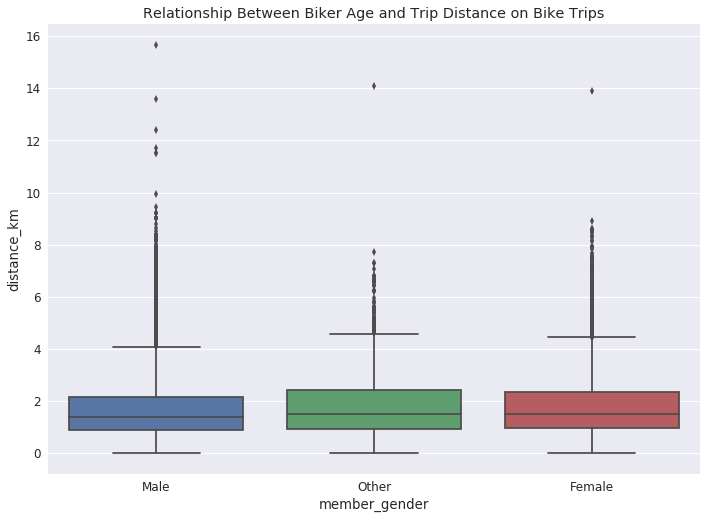

In [138]:
# Boxplot again between member_gender and distance_km but with remove the outlier to be more accuracy..
fig, ax = plt.subplots()
ax=sb.boxplot(x="member_gender", y="distance_km",data=data[data.distance_km<=20])
ax.set_title('Relationship Between Biker Age and Trip Distance on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()


#### -The median trips distance for females is slightly higher than males despite of the number of males are higher.

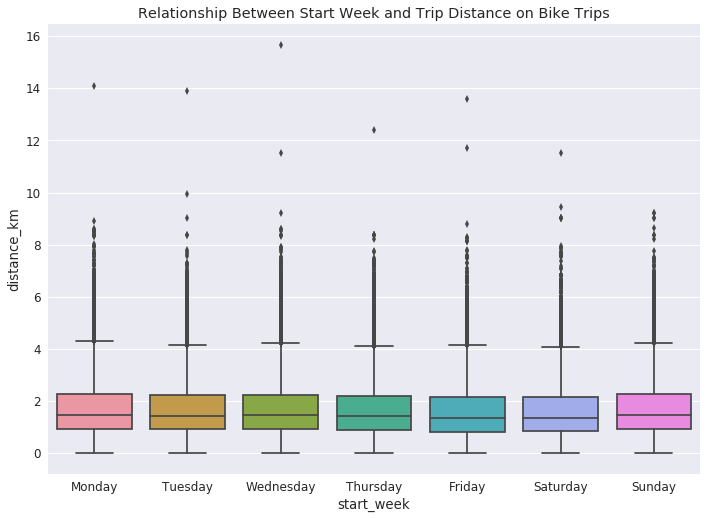

In [139]:
# Boxplot again between start_week and distance_km but with remove the outlier to be more accuracy..
fig, ax = plt.subplots(figsize = [20,14])
less_twenty = data[data.distance_km<=20]
g = sb.boxplot(x="start_week", y="distance_km", data = less_twenty)
g.set_title('Relationship Between Start Week and Trip Distance on Bike Trips')
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
ax.set_xticklabels(days_order)
fig.set_size_inches(11.7, 8.27)
plt.show()

#### - The median distance for all week days are almost the same.

In [140]:
# create a group category of age 

data['age_group'] = data['member_age'].apply(lambda x: '0 - 18' if 0<x<=18
                                                  else '19 - 25' if 18<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 65' if 55<x<=65
                                                       else x)

In [141]:
# create age order 
group_means = data.groupby(['age_group']).count()
age_order = group_means.sort_values(['age_group'], ascending = True).index

Text(0.5,1,'Count of Bike trips by User Type and Age of Member')

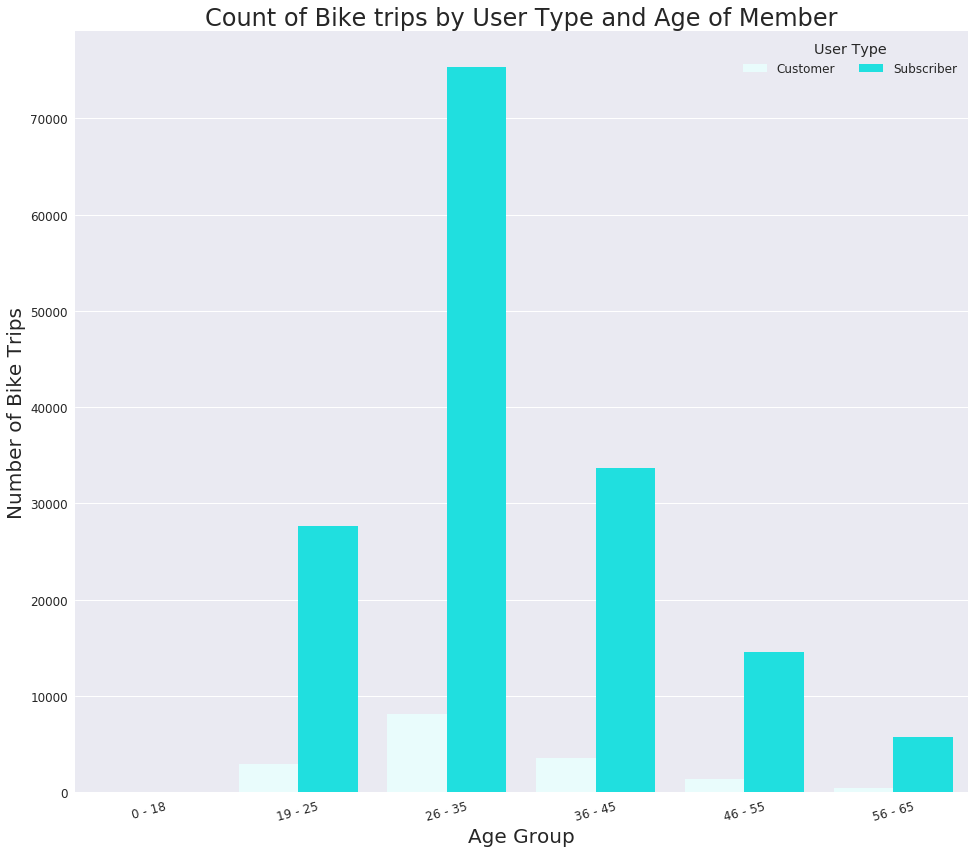

In [142]:
fig, ax = plt.subplots( figsize = [16,14])

ax = sb.countplot(data = data, x = 'age_group', hue = 'user_type', color= '#00FFFF', order=age_order)

ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type')
plt.xticks(rotation = 15)
plt.xlabel('Age Group',fontsize= 20)
plt.ylabel('Number of Bike Trips',fontsize= 20);
plt.title('Count of Bike trips by User Type and Age of Member', fontsize=24)


####   - Using a clustered bar chart to display the categories from user type compared to age brackets to determine count of bike trips

 - -There isn't a obvious trend between duration and distance.
 -  There is relation between start_hour, end_hour and duration_min, distance_km.
 -  There is another prove that males are more as subscriber and customer than Feamles.
 -  The subscibers are more than customers in all week days but the customers number of bike trip is the same in all weekdays.
 -  Customers are leisure riders since subscribers are most likely to use the bikes Monday to Friday at around -9am and 5-6pm



- Not really
- Subscriber user types seem to have more common, shorter travel durations and distances, while customers are longer in each case which is of interest.

#  Multivariate Exploration



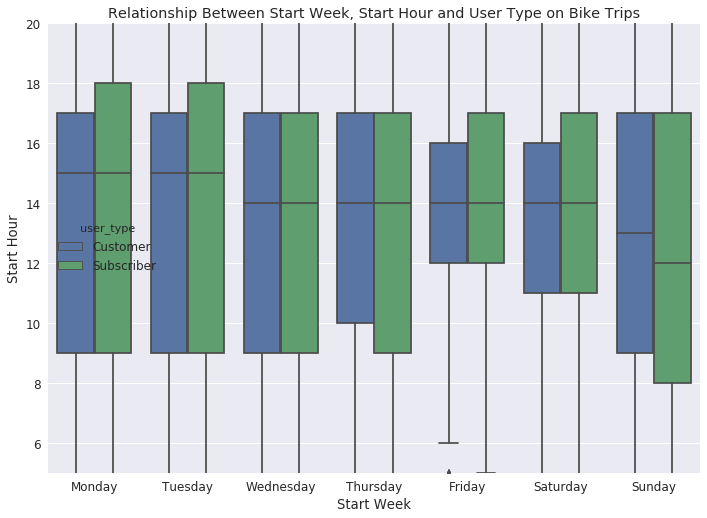

In [143]:
# Boxplot between start_week, start_hour and user_type to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="start_hour", hue="user_type",data=data)
ax.set_title('Relationship Between Start Week, Start Hour and User Type on Bike Trips')
plt.xlabel('Start Week')
plt.ylabel('Start Hour')
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
ax.set_xticklabels(days_order)
fig.set_size_inches(11.7, 8.27)
plt.ylim([5,20])
plt.show();
plt.figure();

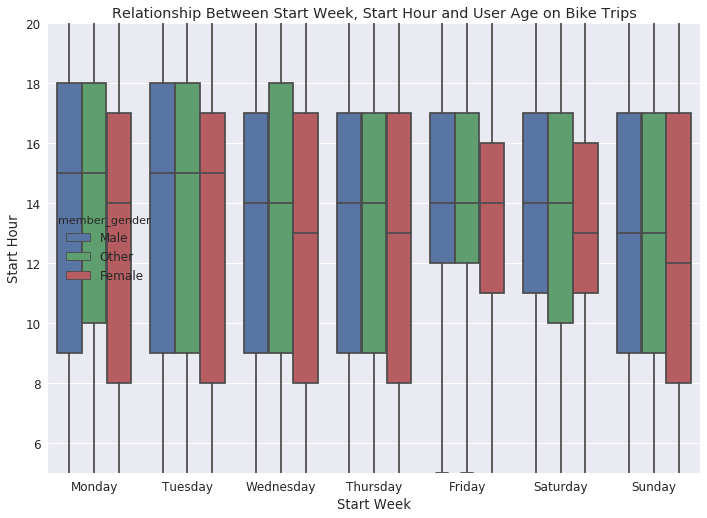

In [144]:
# Boxplot between start_week, start_hour and member_gender to visualize their effect on Bike trips..
fig, ax = plt.subplots(figsize=[16,14])
ax=sb.boxplot(x="start_week", y="start_hour", hue="member_gender",data=data)
ax.set_title('Relationship Between Start Week, Start Hour and User Age on Bike Trips')
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
plt.xlabel('Start Week')
plt.ylabel('Start Hour')
ax.set_xticklabels(days_order)
plt.ylim([5,20])
fig.set_size_inches(11.7, 8.27)
plt.show();

#### This increases our proof that for female their median start_hour are earlier than males in some weekdays.

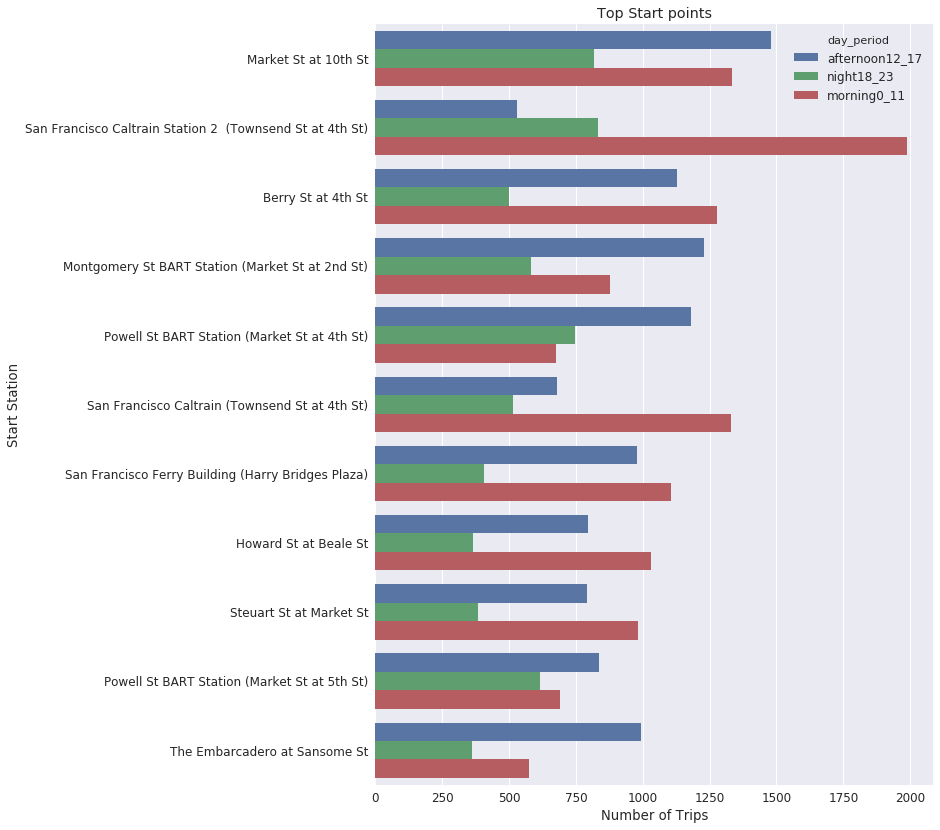

In [145]:
# Boxplot between start_station_name and day_period to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax= sb.countplot(y='start_station_name',data= data,hue='day_period', order=data.start_station_name.value_counts().index[:11])
ax.set(xlabel='Number of Trips', ylabel='Start Station', title= 'Top Start points')
fig.set_size_inches(10, 14)
plt.show();

#### - Afternoon and Morning periods have the highest for number of trips for all top start stations.

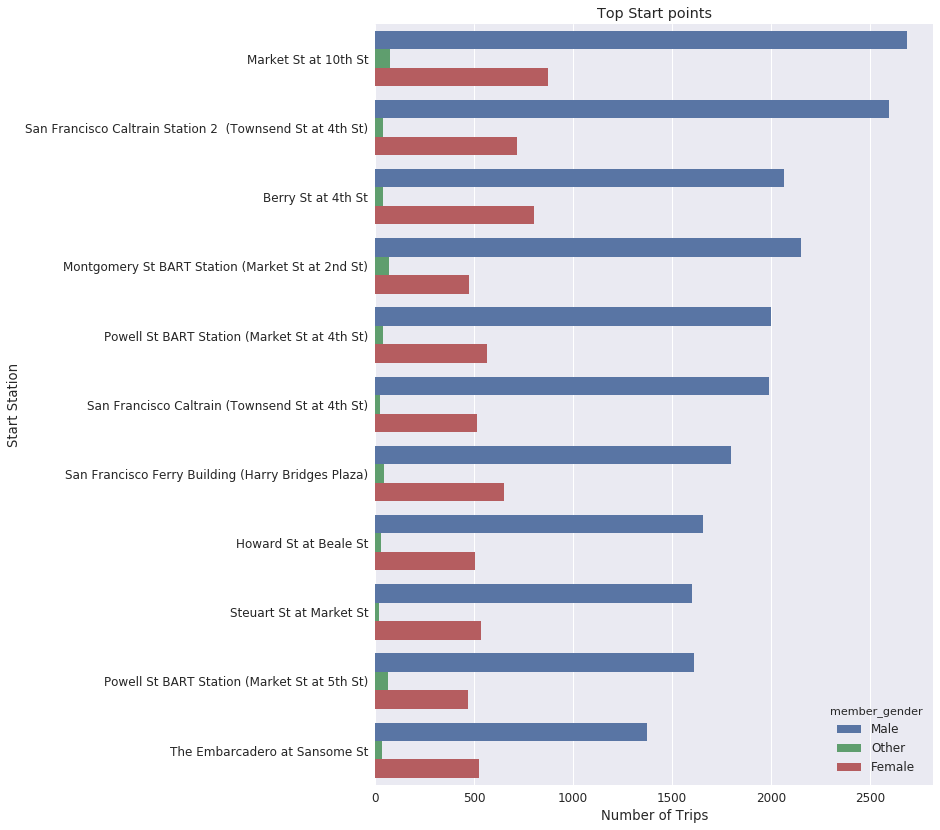

In [146]:
# Boxplot to show the relationship between start_station_name and member_gender to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax= sb.countplot(y='start_station_name',data= data,hue='member_gender', order=data.start_station_name.value_counts().index[:11])
ax.set(xlabel='Number of Trips', ylabel='Start Station', title= 'Top Start points')
fig.set_size_inches(10, 14)
plt.show();

#### - The males have the highest for number of trips for all top start stations.

- - For all week days the range of start hour is between 9 to 18 but it is a very good figure that shows there are week days that the spread of subscribers is very close to the customer.
- For females their median start_hour are earlier than males in some weekday
- The males are the highest for number of trips for all top start stations.
-  afternoon and morning periods are the highest for number of trips for all top start stations.


 - We saw the interactions of features compared to the start stations that shows when, which gender, where and how early are trips taken. 

## Conclusions


- I Changed the date columns from object to 'datetime' data type.
- Changed the start_station, end_station and member_birth_year from float to int64
- created a member_age column for eay working and also created age category for the visulization phase
- I reduced the member_gender column into just three categories because there was a mixture of values
- Created a data copy for these data cleaning and eventually saved it into a csv file which was used for visualization